<a href="https://colab.research.google.com/github/sahana3131/ML4SCI-QMLHEP03/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing pennylane

In [ ]:
!pip install pennylane --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import pennylane as qml
import numpy as np
from tensorflow.keras.datasets import mnist

In [ ]:
n_epochs = 30 
n_layers = 1  
n_train = 50  
n_test = 30    

SAVE_PATH = "quanvolution/"
PREPROCESS = True           
np.random.seed(0)           
tf.random.set_seed(0)  

# Loading the **mnist** dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Normalize pixel values within 0 and 1
x_train = x_train / 255
x_test = x_test / 255



#Defining the quantum circuit


In [ ]:
def q_circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=range(4))
    qml.templates.StronglyEntanglingLayers(params, wires=range(4))
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

In [ ]:
def swap_test_circuit(params, x1, x2):
    qml.Hadamard(wires=0)
    qml.CSWAP(wires=[0, 1, 2])
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.CSWAP(wires=[0, 1, 2])
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

In [ ]:
def contrastive_loss(y_true, y_pred, margin=1):
    loss = y_true * tf.square(tf.maximum(0., margin - y_pred)) + (1 - y_true) * tf.square(y_pred)
    return tf.reduce_mean(loss)

In [ ]:
dev = qml.device("default.qubit", wires=4)

In [ ]:
@qml.qnode(dev, interface="tf")
def quantum_model(inputs, params):
    return q_circuit(params, inputs)

@qml.qnode(dev, interface="tf")
def swap_test(inputs_1, inputs_2, params):
    return swap_test_circuit(params, inputs_1, inputs_2)

In [ ]:
import numpy as np

params = np.random.randn(10)  

In [ ]:
def MyModel():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=lambda y_true, y_pred: contrastive_loss(y_true, y_pred, margin=1))

In [ ]:
params = np.random.normal(loc=0, scale=0.1, size=(n_layers, n_wires))


In [ ]:
q_model = MyModel()

q_history = q_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=4,
    epochs=10,
    verbose=2,
)

Epoch 1/10
15000/15000 - 36s - loss: 0.1991 - accuracy: 0.9402 - val_loss: 0.1119 - val_accuracy: 0.9671 - 36s/epoch - 2ms/step
Epoch 2/10
15000/15000 - 34s - loss: 0.0942 - accuracy: 0.9715 - val_loss: 0.0911 - val_accuracy: 0.9721 - 34s/epoch - 2ms/step
Epoch 3/10
15000/15000 - 36s - loss: 0.0693 - accuracy: 0.9784 - val_loss: 0.0916 - val_accuracy: 0.9742 - 36s/epoch - 2ms/step
Epoch 4/10
15000/15000 - 34s - loss: 0.0563 - accuracy: 0.9830 - val_loss: 0.0794 - val_accuracy: 0.9776 - 34s/epoch - 2ms/step
Epoch 5/10
15000/15000 - 34s - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0953 - val_accuracy: 0.9767 - 34s/epoch - 2ms/step
Epoch 6/10
15000/15000 - 35s - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.1008 - val_accuracy: 0.9770 - 35s/epoch - 2ms/step
Epoch 7/10
15000/15000 - 37s - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.1045 - val_accuracy: 0.9784 - 37s/epoch - 2ms/step
Epoch 8/10
15000/15000 - 37s - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.1188 - val_accuracy: 0.9779

<ipython-input-83-9a19926524b0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


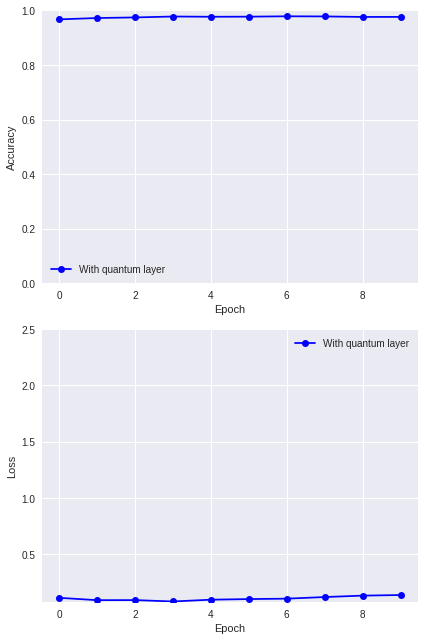

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()
ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()